In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### pour installer tensorflow
voir les instructions données ici : https://github.com/jeffheaton/t81_558_deep_learning/tree/master/install
liste des versions de tensorflow dans les différents channels : https://anaconda.org/search?q=tensorflow
liste des versions de tensorflow officielles : https://www.tensorflow.org/install/source#tested_build_configurations
avec tensorflow 2.11, il faut installer keras 2.3.1 et un python 3.7 à 3.10

### documentation
Keras : https://keras.io/

In [8]:
# Multilayer perceptron Neural Network
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.utils.vis_utils import plot_model
from keras.layers import Dropout
from keras.utils import np_utils

2023-04-01 11:11:21.609904: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
titanic = pd.read_csv("~/DataspellProjects/TPPandas/Datasets/titanic.csv")

In [5]:
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

In [6]:
titanic['Sex']=titanic['Sex'].map({'male':0,'female':1})
titanic['Embarked']=titanic['Embarked'].map({'S':0,'C':1,'Q':2})
titanic.dropna(subset=features,how="any",inplace=True)

In [7]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",1,39.0,0,5,382652,29.1250,NaN,2.0
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1.0


In [9]:
model = Sequential()
model.add(Dense(12, input_dim=7, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

2023-04-01 11:11:33.619938: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                96        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


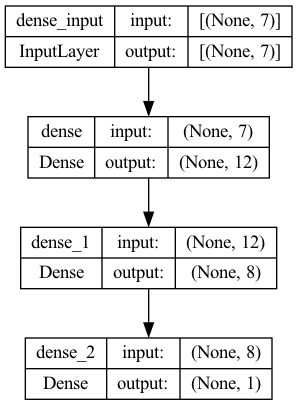

In [15]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [11]:
##### Réglage des paramètres d'apprentissage : (voir https://keras.io/api/optimizers/)
opt = keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [15]:
def plot():
    plt.figure(figsize=(17,14))
    plt.rc('font', size=14)
    plt.ylim(0.5,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.figure(figsize=(17,14))
    plt.rc('font', size=14)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(titanic[features], titanic['Survived'], random_state=0)

In [13]:
history = model.fit(X_train, Y_train, epochs=30, batch_size=10, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/30
54/54 [==============================] - 1s 6ms/step - loss: 0.7802 - accuracy: 0.6517 - val_loss: 0.6713 - val_accuracy: 0.6461
Epoch 2/30
54/54 [==============================] - 0s 2ms/step - loss: 0.5869 - accuracy: 0.6835 - val_loss: 0.6221 - val_accuracy: 0.6573
Epoch 3/30
54/54 [==============================] - 0s 2ms/step - loss: 0.5656 - accuracy: 0.7079 - val_loss: 0.5925 - val_accuracy: 0.6966
Epoch 4/30
54/54 [==============================] - 0s 2ms/step - loss: 0.5360 - accuracy: 0.7341 - val_loss: 0.5786 - val_accuracy: 0.6966
Epoch 5/30
54/54 [==============================] - 0s 2ms/step - loss: 0.5257 - accuracy: 0.7378 - val_loss: 0.5886 - val_accuracy: 0.7247
Epoch 6/30
54/54 [==============================] - 0s 2ms/step - loss: 0.5149 - accuracy: 0.7453 - val_loss: 0.5548 - val_accuracy: 0.7247
Epoch 7/30
54/54 [==============================] - 0s 2ms/step - loss: 0.5091 - accuracy: 0.7659 - val_loss: 0.5325 - val_accuracy: 0.7247
Epoch 8/30
54/54 [==

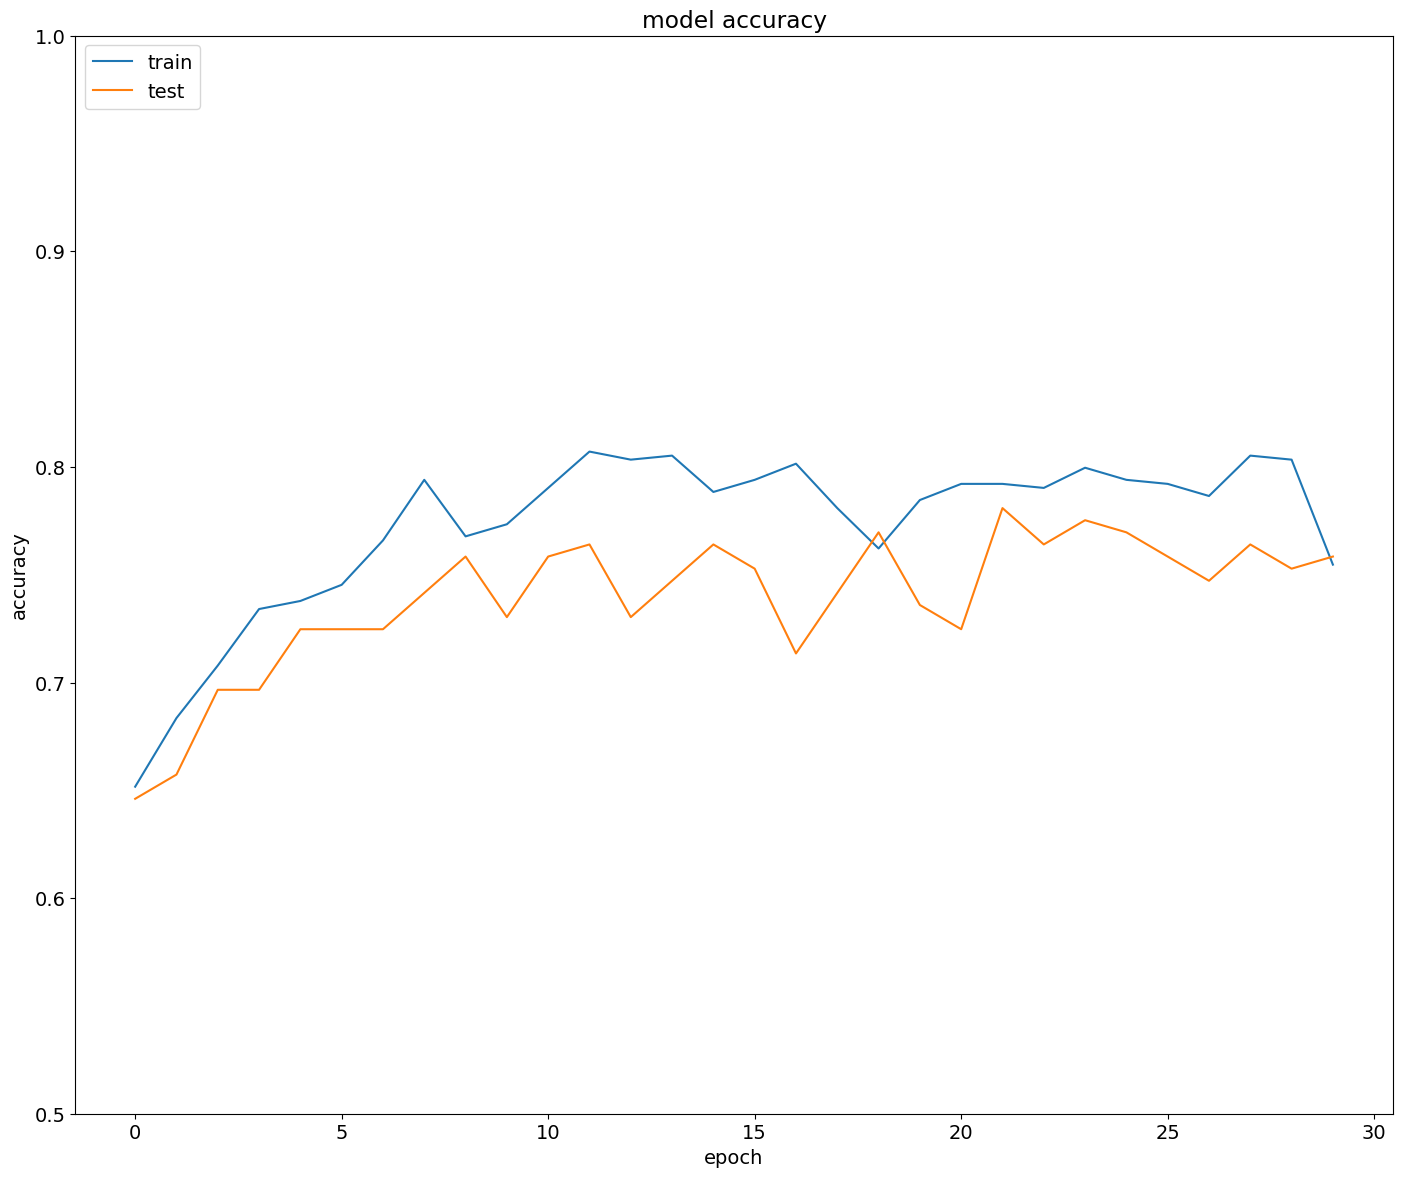

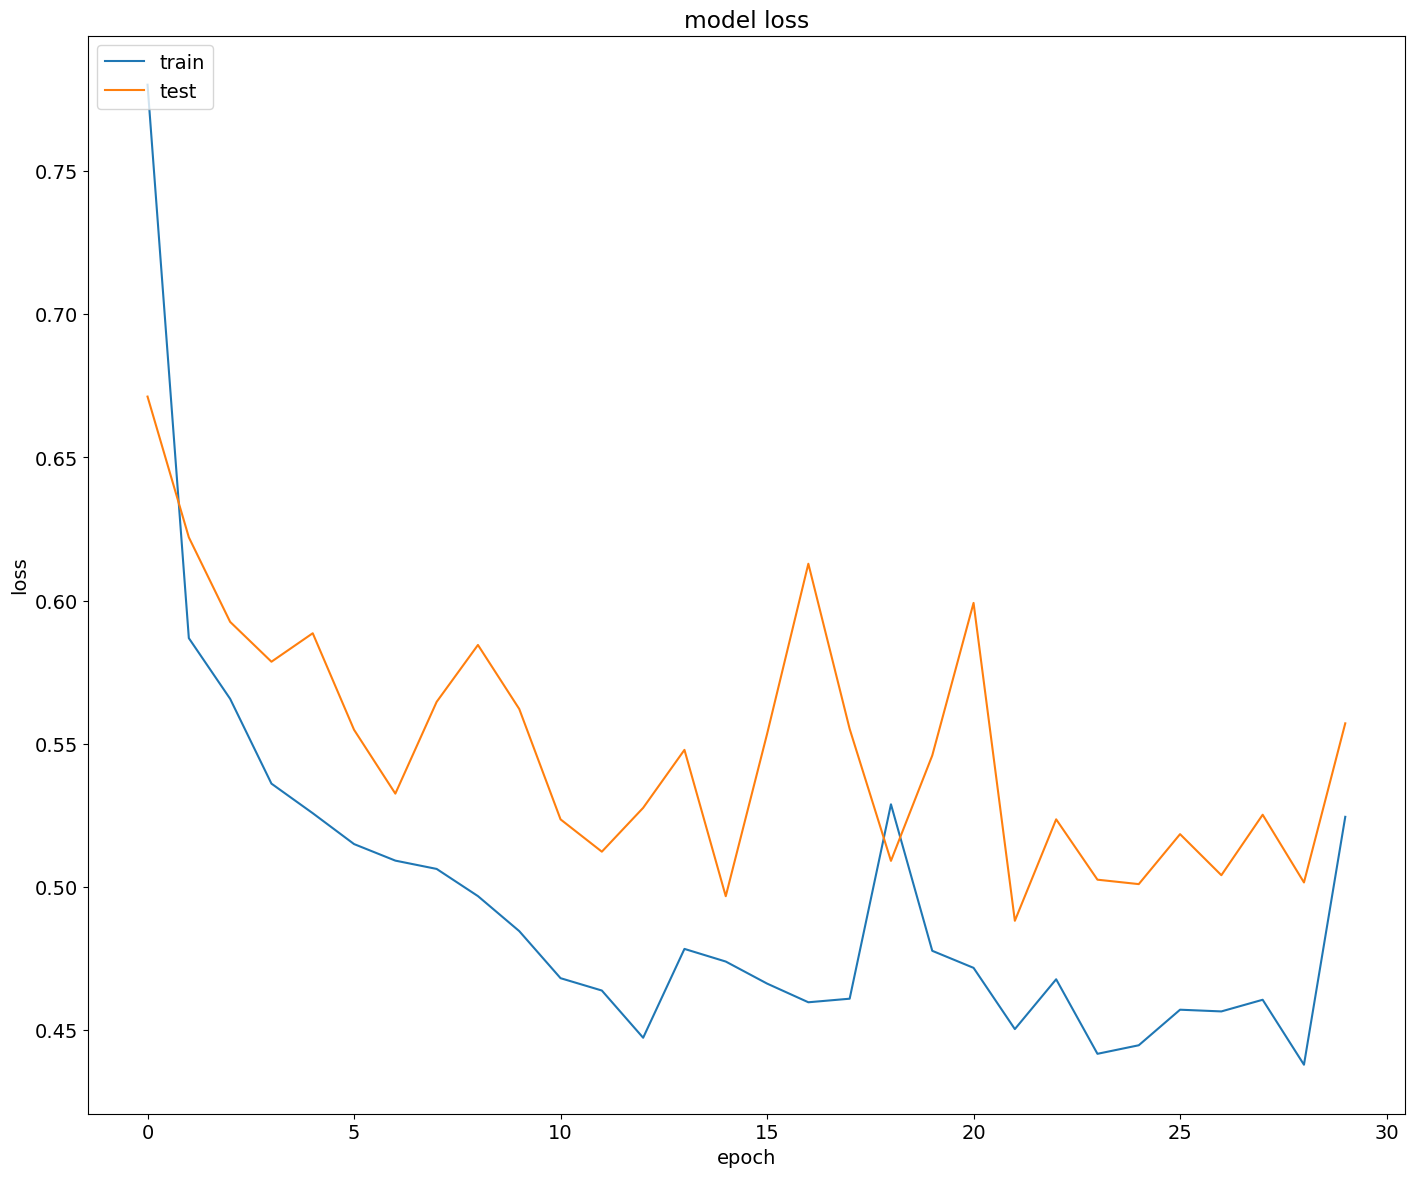

In [16]:
plot()

### Normalisation des données

In [22]:
X_titanic_scaled = titanic[features]
scaler = MinMaxScaler()
X_titanic_scaled = scaler.fit_transform(X_titanic_scaled)
X_titanic_scaled = pd.DataFrame(X_titanic_scaled, columns=features)

In [23]:
X_titanic_scaled

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,0.0,0.271174,0.2,0.000000,0.014151,0.0
1,0.0,1.0,0.472229,0.2,0.000000,0.139136,0.5
2,1.0,1.0,0.321438,0.0,0.000000,0.015469,0.0
3,0.0,1.0,0.434531,0.2,0.000000,0.103644,0.0
4,1.0,0.0,0.434531,0.0,0.000000,0.015713,0.0
...,...,...,...,...,...,...,...
707,1.0,1.0,0.484795,0.0,0.833333,0.056848,1.0
708,0.5,0.0,0.334004,0.0,0.000000,0.025374,0.0
709,0.0,1.0,0.233476,0.0,0.000000,0.058556,0.0
710,0.0,0.0,0.321438,0.0,0.000000,0.058556,0.5


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X_titanic_scaled, titanic['Survived'], random_state=0)

In [25]:
history = model.fit(X_train, Y_train, epochs=50, batch_size=10, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/50
54/54 [==============================] - 0s 3ms/step - loss: 0.4800 - accuracy: 0.8090 - val_loss: 0.4737 - val_accuracy: 0.7697
Epoch 2/50
54/54 [==============================] - 0s 2ms/step - loss: 0.4562 - accuracy: 0.8034 - val_loss: 0.4676 - val_accuracy: 0.7865
Epoch 3/50
54/54 [==============================] - 0s 2ms/step - loss: 0.4480 - accuracy: 0.8184 - val_loss: 0.4700 - val_accuracy: 0.7640
Epoch 4/50
54/54 [==============================] - 0s 2ms/step - loss: 0.4382 - accuracy: 0.8090 - val_loss: 0.4663 - val_accuracy: 0.7921
Epoch 5/50
54/54 [==============================] - 0s 2ms/step - loss: 0.4427 - accuracy: 0.7903 - val_loss: 0.4640 - val_accuracy: 0.7865
Epoch 6/50
54/54 [==============================] - 0s 2ms/step - loss: 0.4340 - accuracy: 0.8127 - val_loss: 0.4623 - val_accuracy: 0.7865
Epoch 7/50
54/54 [==============================] - 0s 2ms/step - loss: 0.4259 - accuracy: 0.8146 - val_loss: 0.4622 - val_accuracy: 0.7697
Epoch 8/50
54/54 [==

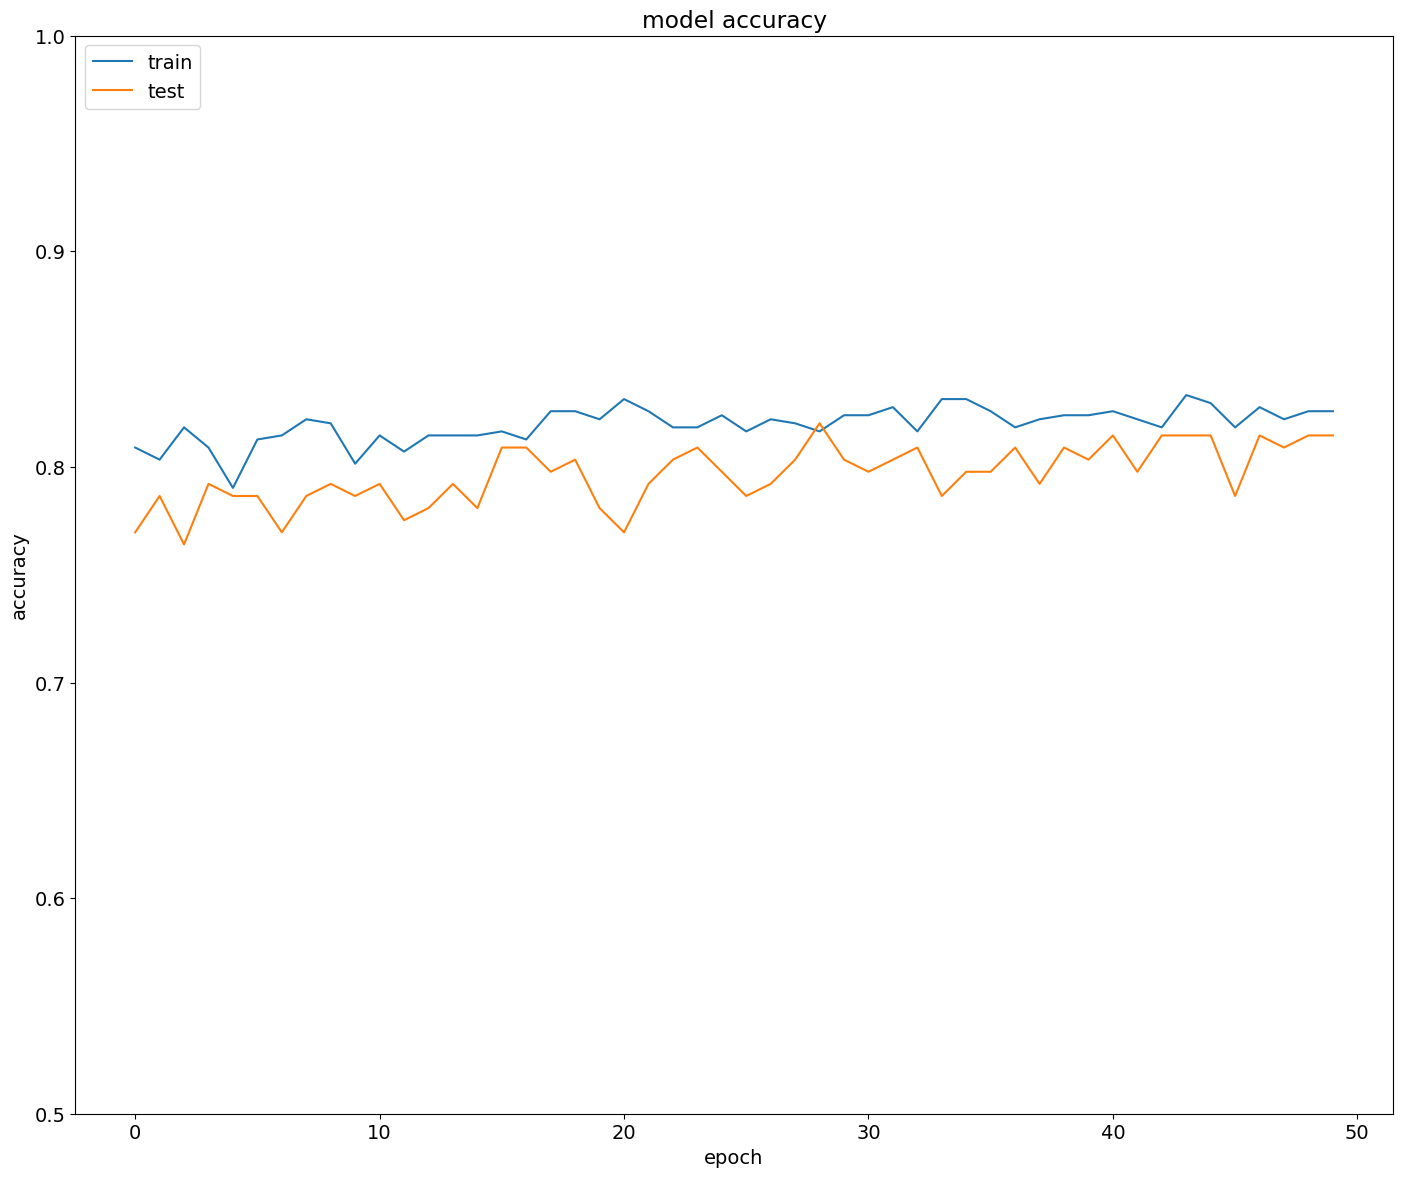

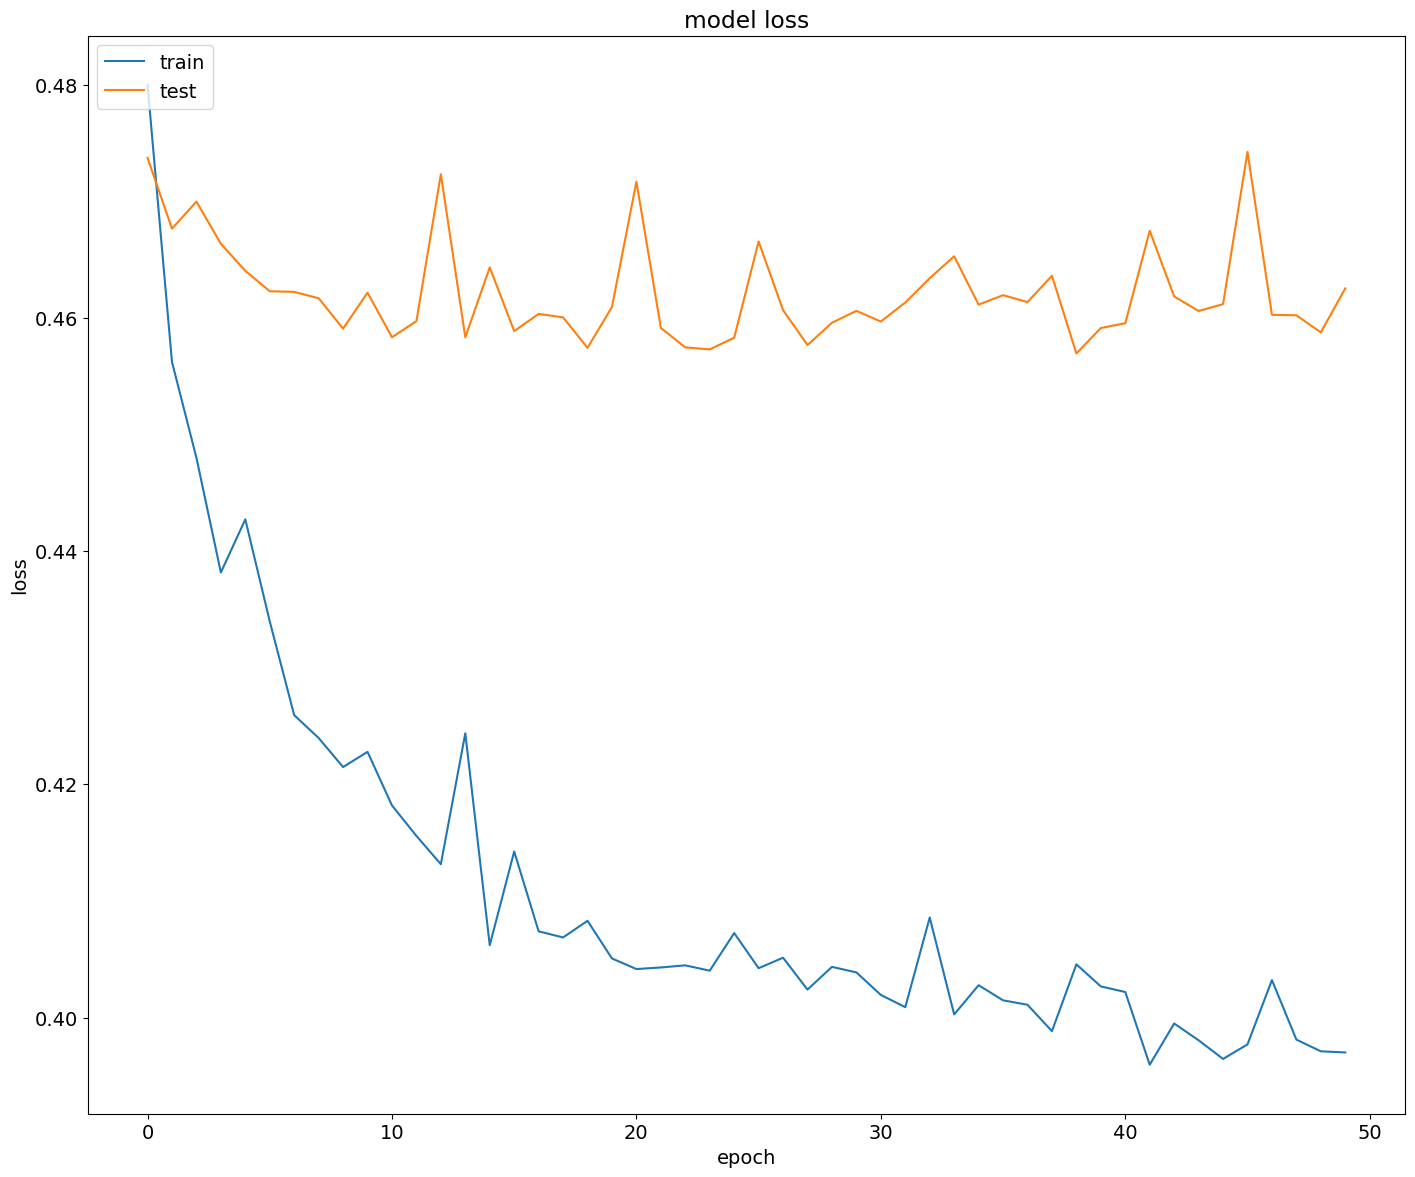

In [26]:
plot()

In [32]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=350, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/10
2/2 [==============================] - 0s 82ms/step - loss: 0.3782 - accuracy: 0.8390 - val_loss: 0.4704 - val_accuracy: 0.8090
Epoch 2/10
2/2 [==============================] - 0s 34ms/step - loss: 0.3781 - accuracy: 0.8371 - val_loss: 0.4703 - val_accuracy: 0.8146
Epoch 3/10
2/2 [==============================] - 0s 33ms/step - loss: 0.3781 - accuracy: 0.8408 - val_loss: 0.4703 - val_accuracy: 0.8146
Epoch 4/10
2/2 [==============================] - 0s 34ms/step - loss: 0.3781 - accuracy: 0.8390 - val_loss: 0.4702 - val_accuracy: 0.8146
Epoch 5/10
2/2 [==============================] - 0s 33ms/step - loss: 0.3781 - accuracy: 0.8371 - val_loss: 0.4701 - val_accuracy: 0.8146
Epoch 6/10
2/2 [==============================] - 0s 35ms/step - loss: 0.3780 - accuracy: 0.8371 - val_loss: 0.4702 - val_accuracy: 0.8146
Epoch 7/10
2/2 [==============================] - 0s 34ms/step - loss: 0.3780 - accuracy: 0.8371 - val_loss: 0.4704 - val_accuracy: 0.8146
Epoch 8/10
2/2 [===========

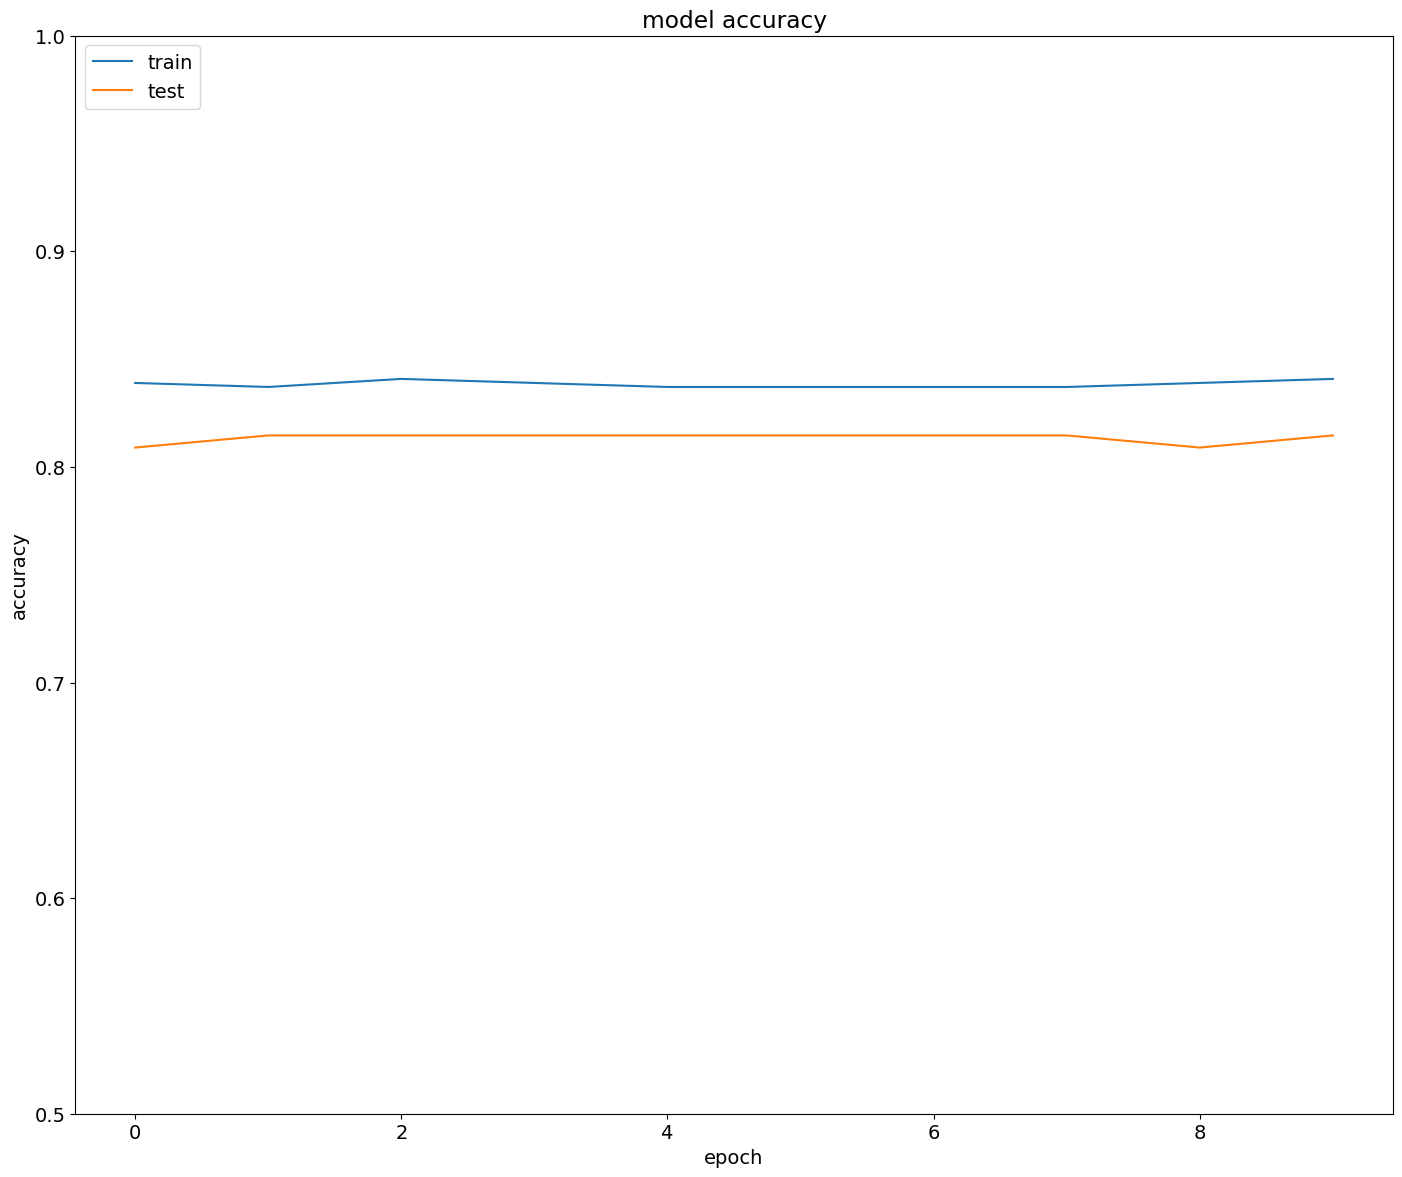

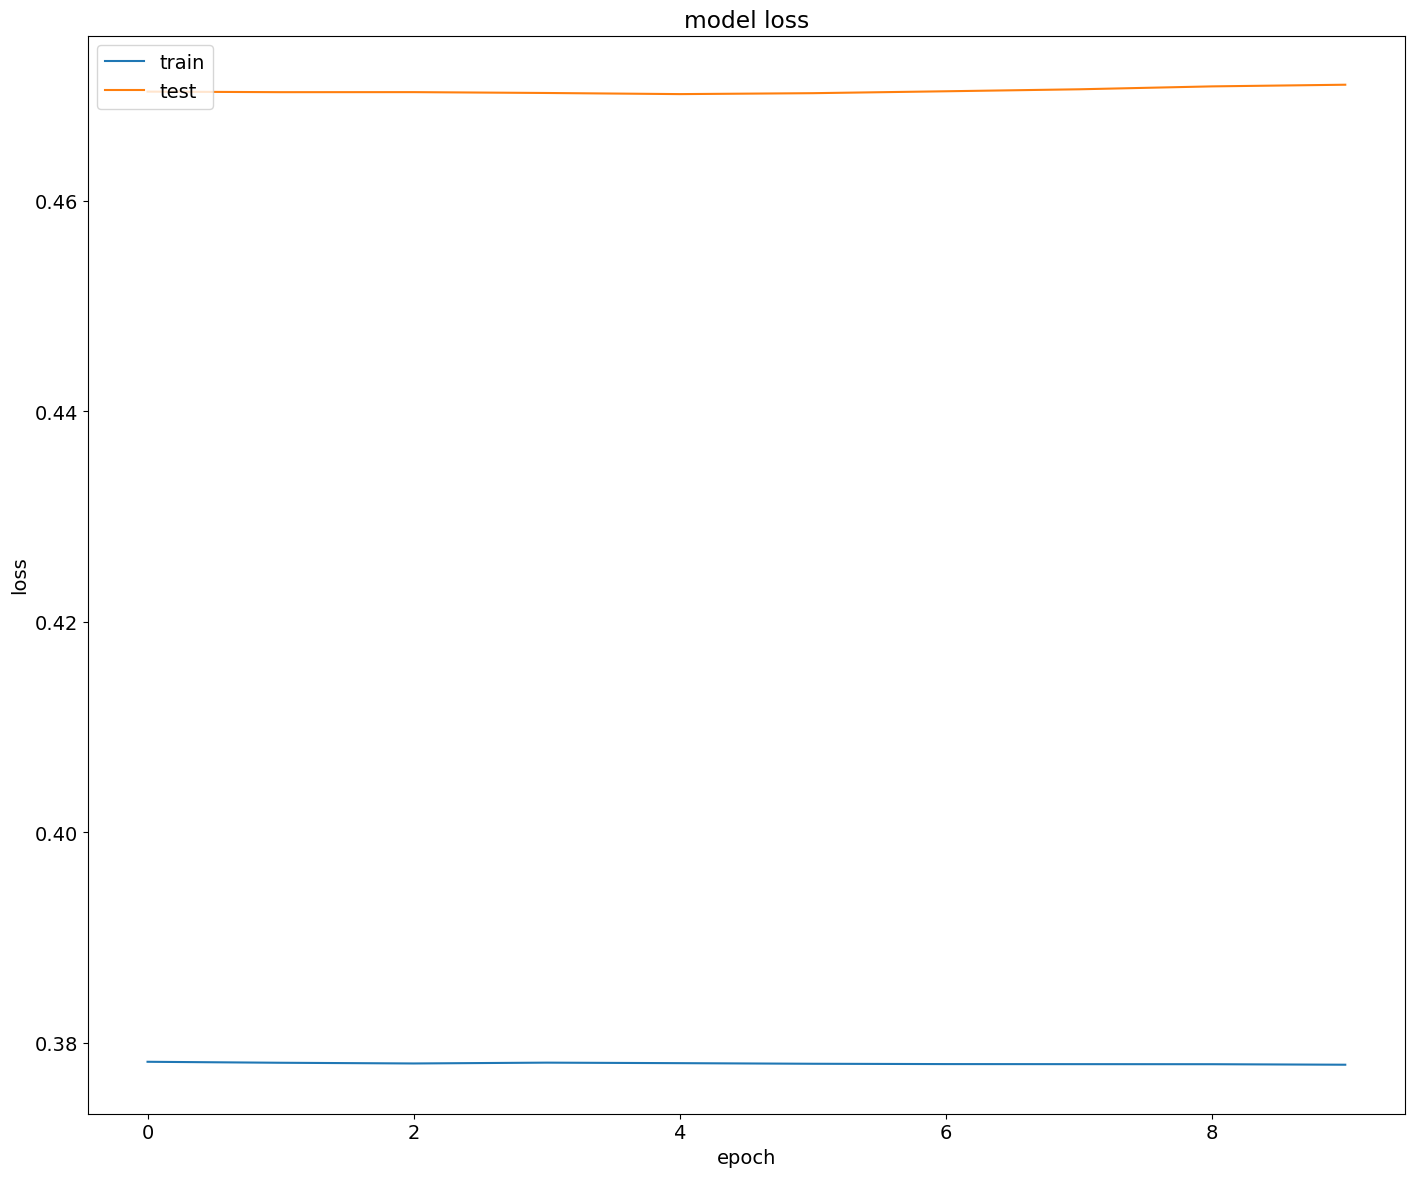

In [33]:
plot()

In [17]:
X_titanic_scaled = titanic[features]
scaler = StandardScaler()
X_titanic_scaled = scaler.fit_transform(X_titanic_scaled)
X_titanic_scaled = pd.DataFrame(X_titanic_scaled, columns=features)

In [18]:
X_titanic_scaled

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.908600,-0.756138,-0.527669,0.522511,-0.506787,-0.516380,-0.501226
1,-1.482983,1.322511,0.577094,0.522511,-0.506787,0.694046,1.417445
2,0.908600,1.322511,-0.251478,-0.552714,-0.506787,-0.503620,-0.501226
3,-1.482983,1.322511,0.369951,0.522511,-0.506787,0.350326,-0.501226
4,0.908600,-0.756138,0.369951,-0.552714,-0.506787,-0.501257,-0.501226
...,...,...,...,...,...,...,...
707,0.908600,1.322511,0.646142,-0.552714,5.350885,-0.102875,3.336115
708,-0.287191,-0.756138,-0.182430,-0.552714,-0.506787,-0.407687,-0.501226
709,-1.482983,1.322511,-0.734812,-0.552714,-0.506787,-0.086335,-0.501226
710,-1.482983,-0.756138,-0.251478,-0.552714,-0.506787,-0.086335,1.417445


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X_titanic_scaled, titanic['Survived'], random_state=0)

In [20]:
history = model.fit(X_train, Y_train, epochs=50, batch_size=10, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/50
54/54 [==============================] - 0s 3ms/step - loss: 0.4880 - accuracy: 0.7828 - val_loss: 0.4826 - val_accuracy: 0.7640
Epoch 2/50
54/54 [==============================] - 0s 3ms/step - loss: 0.4301 - accuracy: 0.8034 - val_loss: 0.4769 - val_accuracy: 0.7865
Epoch 3/50
54/54 [==============================] - 0s 3ms/step - loss: 0.4098 - accuracy: 0.8258 - val_loss: 0.4817 - val_accuracy: 0.7921
Epoch 4/50
54/54 [==============================] - 0s 2ms/step - loss: 0.3975 - accuracy: 0.8390 - val_loss: 0.4759 - val_accuracy: 0.8090
Epoch 5/50
54/54 [==============================] - 0s 2ms/step - loss: 0.3983 - accuracy: 0.8315 - val_loss: 0.4687 - val_accuracy: 0.8146
Epoch 6/50
54/54 [==============================] - 0s 2ms/step - loss: 0.3868 - accuracy: 0.8390 - val_loss: 0.4697 - val_accuracy: 0.8090
Epoch 7/50
54/54 [==============================] - 0s 2ms/step - loss: 0.3783 - accuracy: 0.8446 - val_loss: 0.4682 - val_accuracy: 0.8202
Epoch 8/50
54/54 [==

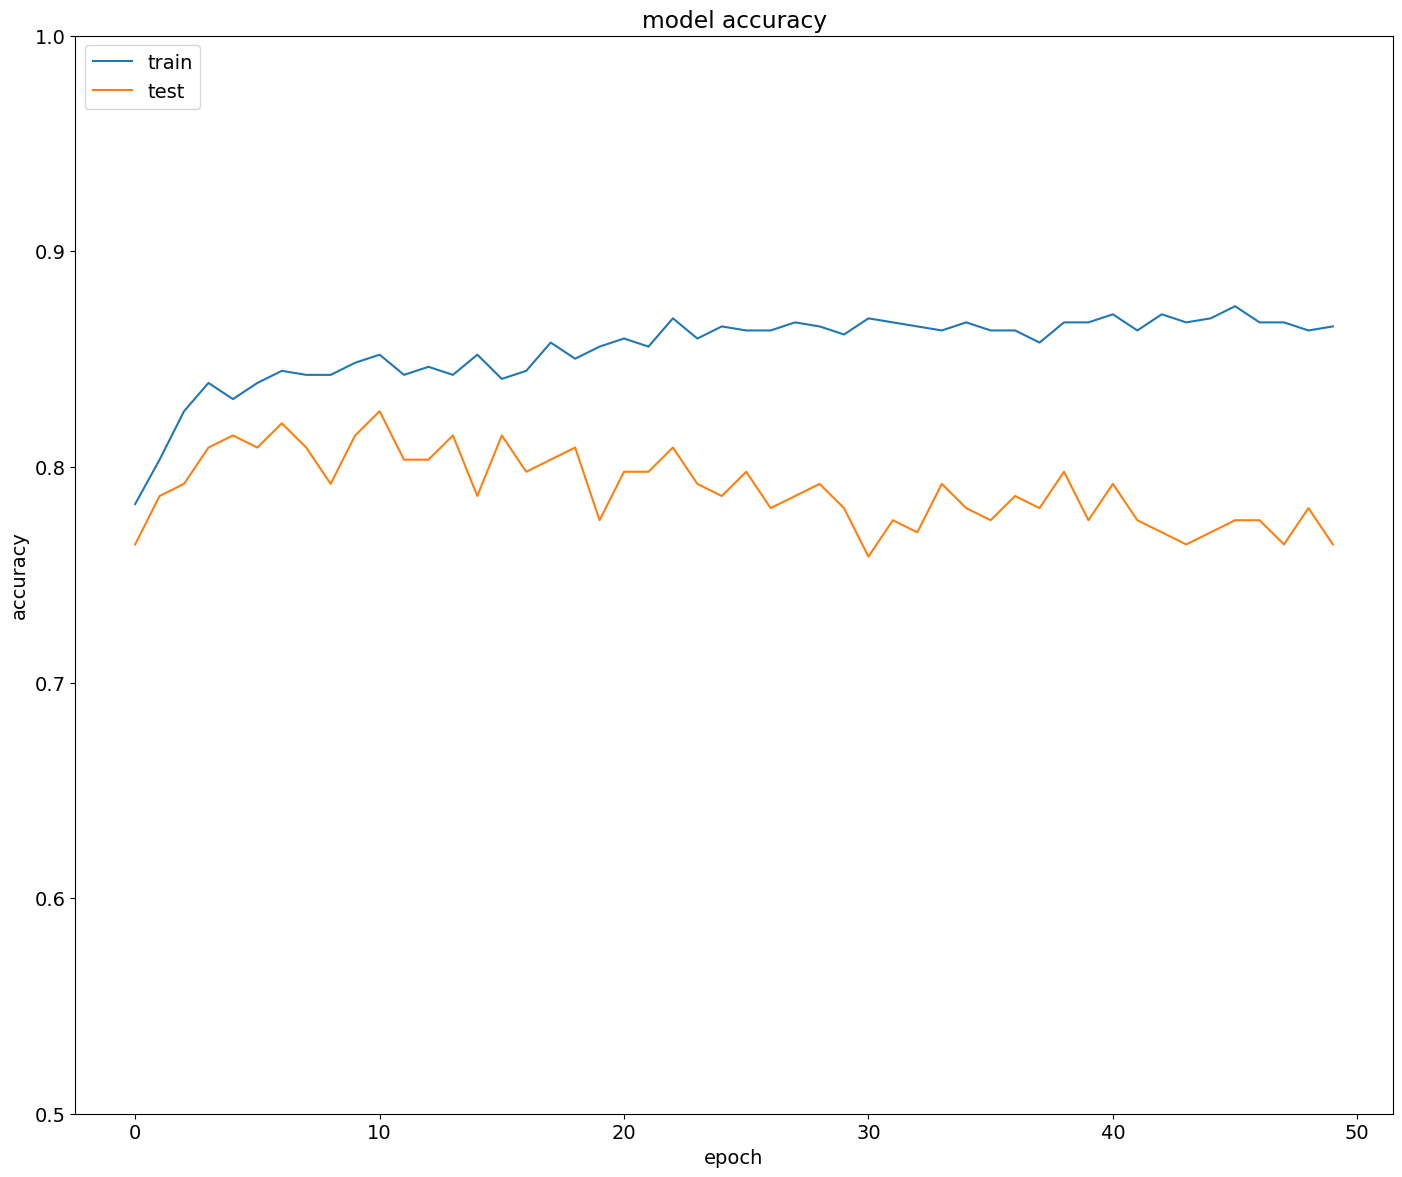

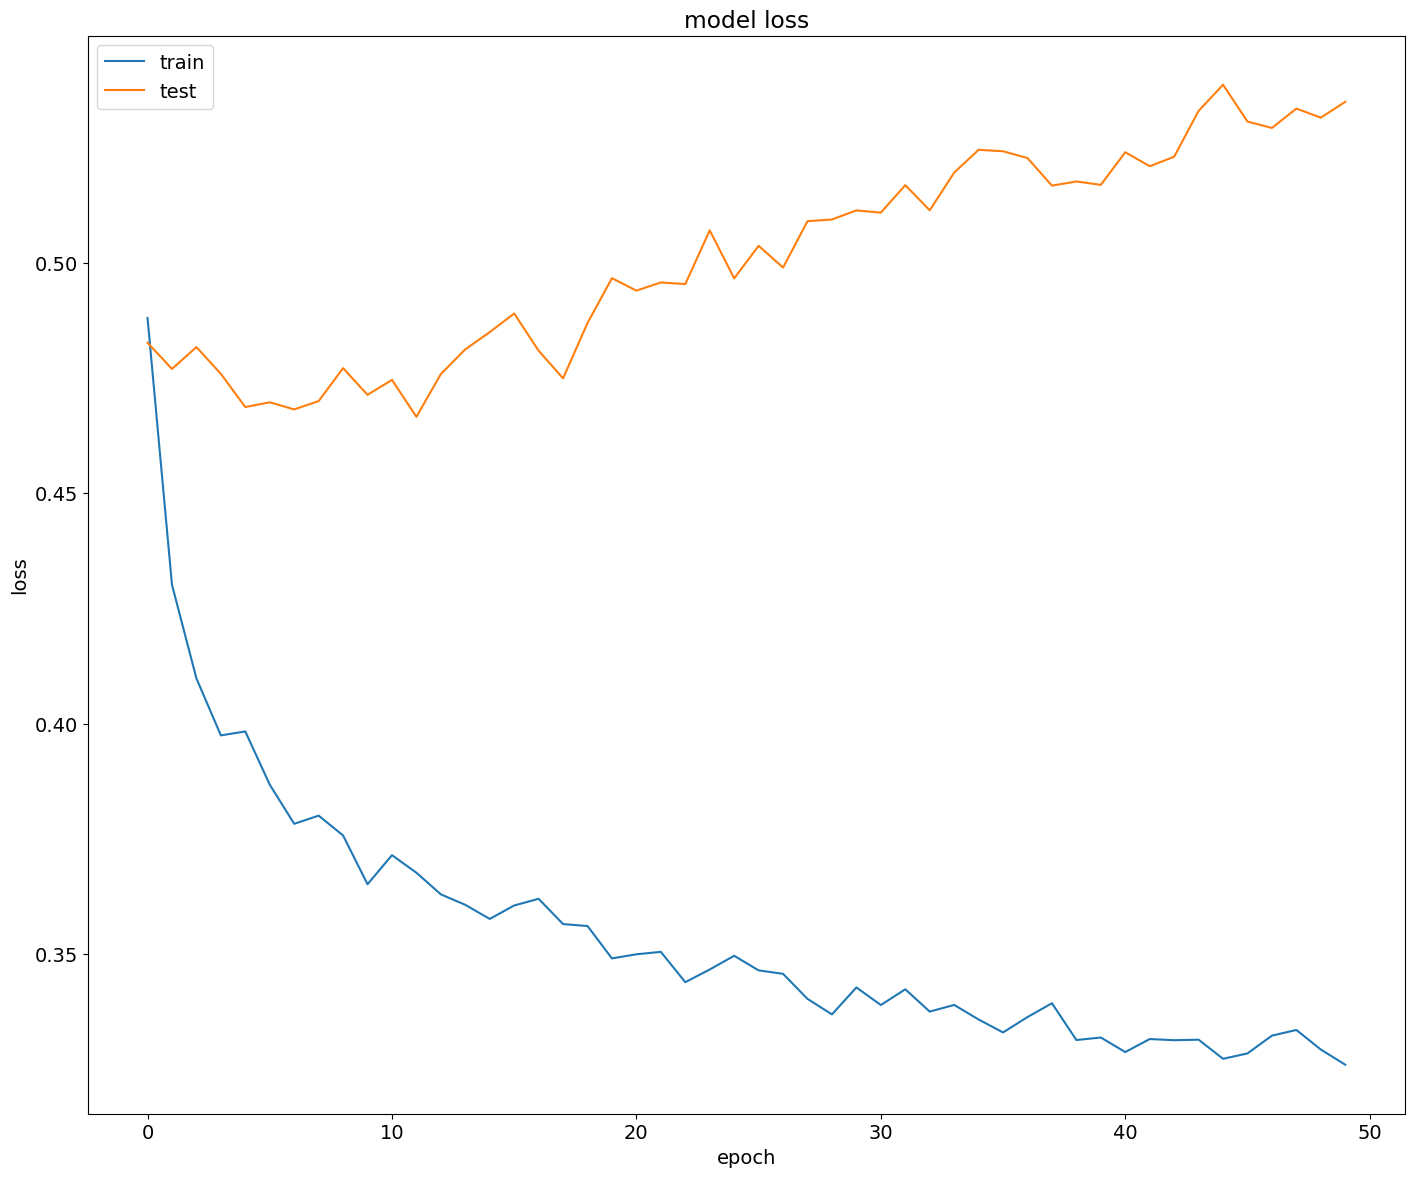

In [21]:
plot()